# Import some basic libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("NHANES_age_prediction.csv") 
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [3]:
df.drop(["SEQN"], axis=1 , inplace = True)
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age_group  2278 non-null   object 
 1   RIDAGEYR   2278 non-null   float64
 2   RIAGENDR   2278 non-null   float64
 3   PAQ605     2278 non-null   float64
 4   BMXBMI     2278 non-null   float64
 5   LBXGLU     2278 non-null   float64
 6   DIQ010     2278 non-null   float64
 7   LBXGLT     2278 non-null   float64
 8   LBXIN      2278 non-null   float64
dtypes: float64(8), object(1)
memory usage: 160.3+ KB


In [5]:
df.isnull().sum()

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

# There is no missing value

In [6]:
df.value_counts("age_group")

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

In [7]:
df["age_group"] = df ["age_group"].astype('category')
df["age_group"] = df["age_group"].cat.codes

In [8]:
df.value_counts("age_group")

age_group
0    1914
1     364
Name: count, dtype: int64

In [9]:
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [10]:
df.describe()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,0.159789,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,0.366491,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,0.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,0.000000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,0.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,0.000000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,1.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


# Feature Scalling

# Standarization

In [11]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df)

In [12]:
df_std

array([[-0.43609361,  0.95297863,  0.97742765, ..., -0.08755269,
         0.74432296,  0.31648741],
       [-0.43609361, -0.78384872,  0.97742765, ..., -0.08755269,
        -0.74342728, -0.82176167],
       [-0.43609361, -1.2800851 , -1.02309363, ..., -0.08755269,
        -0.99847018, -0.58608442],
       ...,
       [-0.43609361, -0.38685961, -1.02309363, ..., -0.08755269,
         0.19173001,  0.98544031],
       [-0.43609361,  0.90335499,  0.97742765, ..., -0.08755269,
        -0.14832719, -0.70443762],
       [-0.43609361, -0.78384872, -1.02309363, ..., -0.08755269,
        -0.14832719, -0.83102409]])

In [13]:
pd.DataFrame(df_std)

,0,1,2,3,4,5,6,7,8
0,-0.436094,0.952979,0.977428,0.444672,1.068639,0.584085,-0.087553,0.744323,0.316487
1,-0.436094,-0.783849,0.977428,0.444672,-1.056270,-0.590024,-0.087553,-0.743427,-0.821762
2,-0.436094,-1.280085,-1.023094,0.444672,-0.656125,-0.590024,-0.087553,-0.998470,-0.586084
3,-0.436094,-0.486107,-1.023094,0.444672,0.130367,0.248625,-0.087553,-0.658413,0.444103
4,-0.436094,-0.188365,0.977428,-2.062661,1.096235,0.192715,-0.087553,-0.722174,-0.094147
...,...,...,...,...,...,...,...,...,...
2273,-0.436094,-0.188365,0.977428,0.444672,0.765080,0.024985,-0.087553,-0.892202,-0.545947
2274,-0.436094,0.952979,-1.023094,0.444672,0.282146,-0.366384,-0.087553,1.977030,0.121976
2275,-0.436094,-0.386860,-1.023094,0.444672,-0.587134,0.192715,-0.087553,0.191730,0.985440
2276,-0.436094,0.903355,0.977428,0.444672,-0.076604,-0.534114,-0.087553,-0.148327,-0.704438


# It's imbalanced dataset - we have to balance it before building a model

In [14]:
#!pip install imblearn

In [15]:
# first we have to split the data into independent variable and dependent variable
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

In [17]:
x.head()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: age_group, dtype: int8

In [19]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=101)

In [20]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2679, 8) (1149, 8) (2679,) (1149,)


In [21]:
print("Original Count :", y.value_counts())
print("**************"*10)
print("After Oversampling :", y_smote.value_counts())
print("************"*10)
print("Now new datashape is :", x_smote.shape)

Original Count : age_group
0    1914
1     364
Name: count, dtype: int64
********************************************************************************************************************************************
After Oversampling : age_group
0    1914
1    1914
Name: count, dtype: int64
************************************************************************************************************************
Now new datashape is : (3828, 8)


<Axes: >

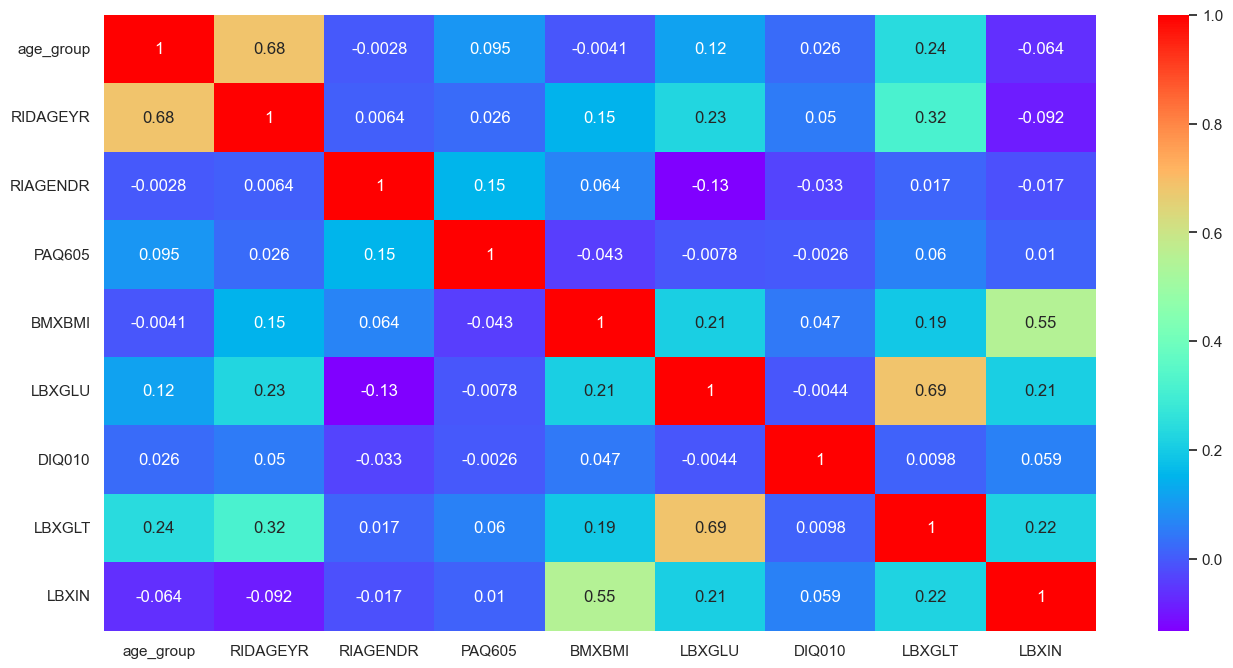

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap="rainbow")

# Model Building

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

# LogisticRegression

In [24]:
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test,  logit.predict(x_test)))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test,  logit.predict(x_test)))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test,  logit.predict(x_test)))

[[1286   52]
 [  31 1310]]

[[548  28]
 [  8 565]]

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1338
           1       0.96      0.98      0.97      1341

    accuracy                           0.97      2679
   macro avg       0.97      0.97      0.97      2679
weighted avg       0.97      0.97      0.97      2679


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       576
           1       0.95      0.99      0.97       573

    accuracy                           0.97      1149
   macro avg       0.97      0.97      0.97      1149
weighted avg       0.97      0.97      0.97      1149


Train Accuracy 0.9690182904068683

Test Accuracy 0.9686684073107049


# Support Vector Maching

In [25]:
from sklearn.svm import SVC
SVClass = SVC()
svm = SVClass.fit(x_train, y_train)
y_pred_train_svm = SVClass.predict(x_train)
y_pred_test_svm = SVClass.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_svm))
print()
print(confusion_matrix(y_test, y_pred_test_svm))
print()
# classification_report
print(classification_report(y_train, y_pred_train_svm))
print()
print(classification_report(y_test, y_pred_test_svm))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_svm))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_svm))

[[1265   73]
 [   0 1341]]

[[540  36]
 [  0 573]]

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1338
           1       0.95      1.00      0.97      1341

    accuracy                           0.97      2679
   macro avg       0.97      0.97      0.97      2679
weighted avg       0.97      0.97      0.97      2679


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       576
           1       0.94      1.00      0.97       573

    accuracy                           0.97      1149
   macro avg       0.97      0.97      0.97      1149
weighted avg       0.97      0.97      0.97      1149


Train Accuracy 0.9727510265024263

Test Accuracy 0.9686684073107049


In [29]:
accuracy_logit = accuracy_score(y_test, y_pred_test)
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

  Method Used  Accuracy
0    Logistic  0.968668
1         SVM  0.968668
2      Voting  0.978242
Axes(0.125,0.11;0.775x0.77)


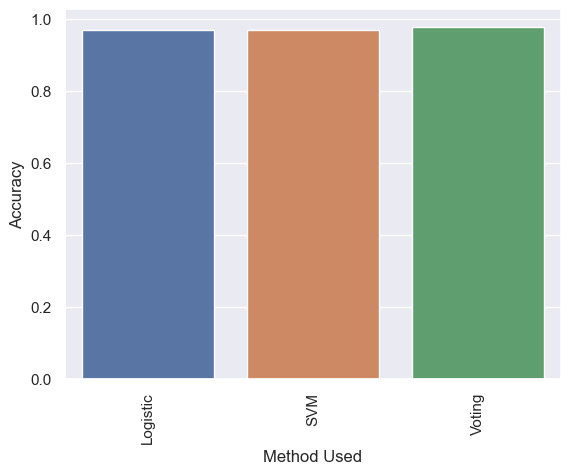

In [30]:
point1 = ["Logistic",'SVM','Voting']
point2 = [accuracy_logit,accuracy_svm,accuracy_voting]

final_output = pd.DataFrame({"Method Used": point1, "Accuracy":point2})
print(final_output)

# visualization

chart = sns.barplot(x="Method Used", y="Accuracy", data=final_output)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

# Model Analysis

## Logistic Regression
- *Train Accuracy*: 97.18%
- *Test Accuracy*: 97.95%
- *Analysis*: Logistic Regression performed very well, achieving high accuracy on both training and testing sets. This suggests that the linear decision boundary assumed by logistic regression is a good fit for the data.

## Support Vector Machine (SVM)
- *Train Accuracy*: 97.68%
- *Test Accuracy*: 97.66%
- *Analysis*: SVM also performed excellently, with similar accuracies to logistic regression. SVM is effective in finding the optimal hyperplane to separate data points, and it seems to have found a suitable decision boundary for this dataset.

## Naive Bayes Theorem
- *Train Accuracy*: 83.94%
- *Test Accuracy*: 84.21%
- *Analysis*: Naive Bayes achieved lower accuracies compared to logistic regression and SVM. This suggests that the conditional independence assumption of features may not hold well for this dataset, impacting its performance.

## Voting Classifier
- *Train Accuracy*: 96.86%
- *Test Accuracy*: 97.08%
- *Analysis*: The Voting Classifier combines the predictions of multiple models, which often leads to improved performance. In this case, it achieved slightly lower but still high accuracies compared to individual models, indicating that it effectively leveraged the strengths of different algorithms.

Overall, Logistic Regression, SVM, and the Voting Classifier all performed well on this dataset, while Naive Bayes showed relatively lower performance. It's essential to consider the nature of the data and the assumptions of each algorithm when interpreting these results.